In [3]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [5]:
data_true=pd.read_csv("/content/drive/MyDrive/fake news/fake news/Fake.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/fake news/fake news/True.csv")

In [6]:
data_true.head(5)
data_fake.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
data_true.shape, data_fake.shape

((23481, 4), (21417, 4))

In [8]:
data_true["class"]=1
data_fake["class"]=0

In [9]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [10]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [11]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


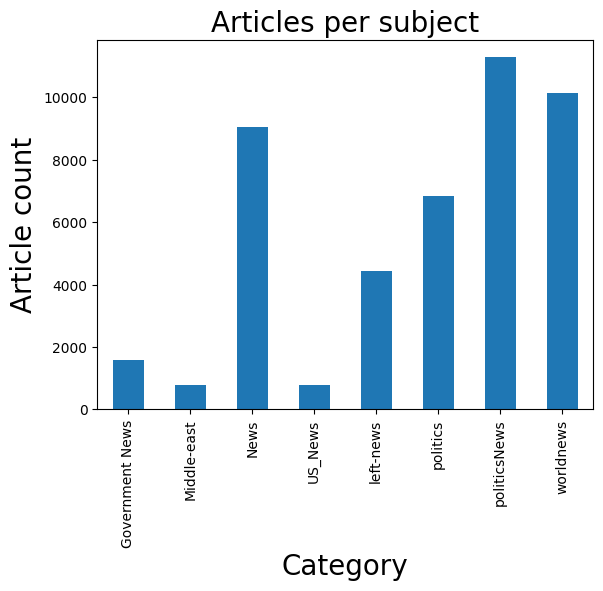

In [12]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    21407
1    23471
Name: text, dtype: int64
0 = Fake news
1 = True news


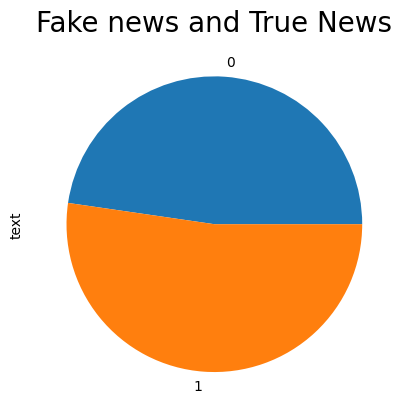

In [13]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [14]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset
data=data.sample(frac=1)
data.head(10)

,text,class
16781,TOKYO (Reuters) - Japanese Prime Minister Shin...,0
16645,The irony in Obama s radical Treasury Secretar...,1
2246,Donald Trump thinks the healthcare bill Republ...,1
19844,LONDON (Reuters) - A magnitude 5.9 earthquake ...,0
5836,Now that Republicans are only a month away fro...,1
10794,"SPRINGFIELD, Ill. (Reuters) - Illinois Republi...",0
17027,SEOUL (Reuters) - Former U.S. presidential can...,0
17954,MOSCOW (Reuters) - U.S. government-sponsored R...,0
6180,WASHINGTON (Reuters) - They voted to “drain th...,0
2146,"Other than the wall and maybe the Muslim ban, ...",1


In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
